<a href="https://colab.research.google.com/github/gslari/ProjectCO2Emissions/blob/main/MVP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Source,County,Address,Total Emissions (MT CO2e),Biogenic CO2 (MT CO2),Fossil CO2 (MT CO2),Methane (MT CO2e),Nitrous Oxide (MT CO2e),Hydrofluorocarbons (MT CO2e),Perfluorocarbons (MT CO2e),...,Other (MT CO2e),"Location (Latitude, Longitude)",Sector,Sub Sector,Clean Air Rule,"Energy-Intensive, Trade-Exposed",Point Size- Based on Total Emissions,WAOFM - GIS - Legislative District Boundary,Counties,Congressional Districts
0,Agrium Kennewick Fertilizer Operations (KFO) -...,Benton,"227515 E. Bowles Rd Kennewick, WA 99337",155888,0,10731,1,145157,0,0,...,0,"(46.165957, -119.017218)",Chemicals,Nitric Acid Production,YES,YES,3,23,2955,4
1,Air Liquide Hydrogen Plant - Anacortes,Skagit,"8581 South Texas Road Anacortes, WA 98221",64413,0,64413,0,0,0,0,...,0,"(48.465617, -122.556032)",Chemicals,Hydrogen Production,NO,NO,2,43,3212,2
2,Alcoa Intalco Works - Ferndale,Whatcom,"4050 Mountain View Road Ferndale, WA 98248",1195786,0,418042,10480,34,0,767230,...,0,"(48.8455, -122.7055)",Metals,Aluminum Production,YES,YES,4,44,2744,1
3,Alcoa Wenatchee Works - Malaga,Chelan,"6200 Malaga/Alcoa Hwy. Malaga, WA 98828",331207,0,254025,14,16,0,77152,...,0,"(47.3567, -120.1273)",Metals,Aluminum Production,YES,YES,3,18,2956,8
4,Ardagh Glass Inc. - Seattle,King,"5801 East Marginal Way South Seattle, WA 98134",76674,0,76614,27,32,0,0,...,0,"(47.55242, -122.33739)",Minerals,Glass Production,YES,NO,2,17,3009,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Vertellus Performance Chemicals LLC - Elma,Grays Harbor,"4800 State Route 12 Elma, WA 98541",17600,0,17582,8,10,0,0,...,0,"(46.995459, -123.382316)",Chemicals,Other Chemicals,NO,YES,1,30,2983,6
137,WaferTech LLC - Camas,Clark,"5509 NW Parker St Camas, WA 98607",172725,0,13050,6,7177,10646,78165,...,24486,"(45.619569, -122.454955)",Manufacturing,Electronics Manufacturing,YES,NO,3,25,2977,3
138,Washington State University - Pullman,Whitman,"2660 Grimes Way Pullman, WA 99164-1172",57370,0,57309,28,34,0,0,...,0,"(46.728702, -117.151481)",Government,Education,NO,NO,2,13,2745,5
139,Waste Management Greater Wenatchee Regional La...,Douglas,"191 Webb Road East Wenatchee, WA 98802",31208,0,0,31208,0,0,0,...,0,"(47.405083, -120.167444)",Waste,Municipal Landfills,NO,NO,2,18,2979,4


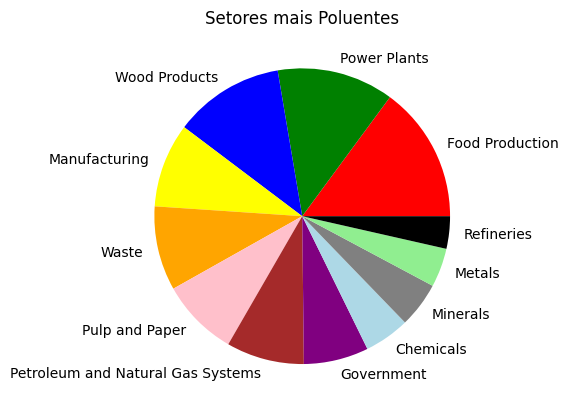

<ipython-input-18-1791b196acb6>:69: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


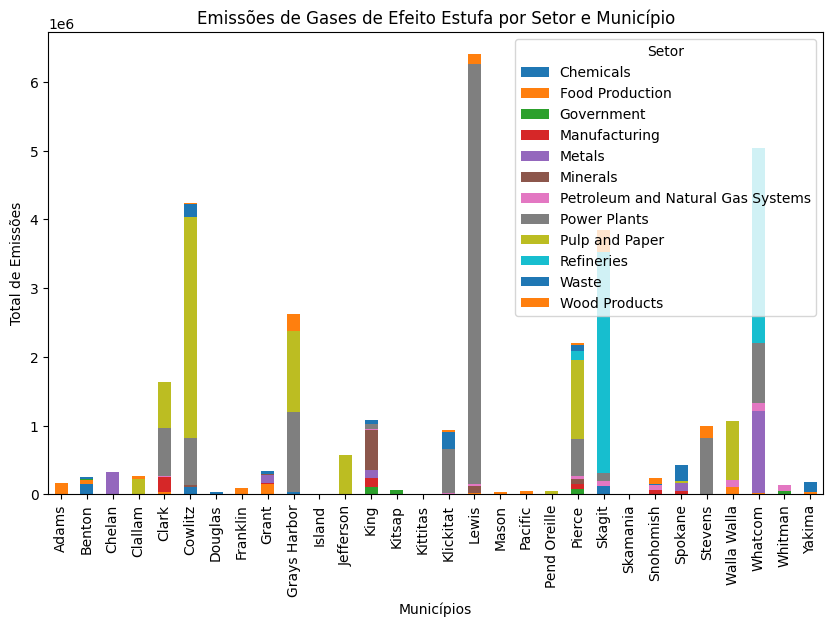

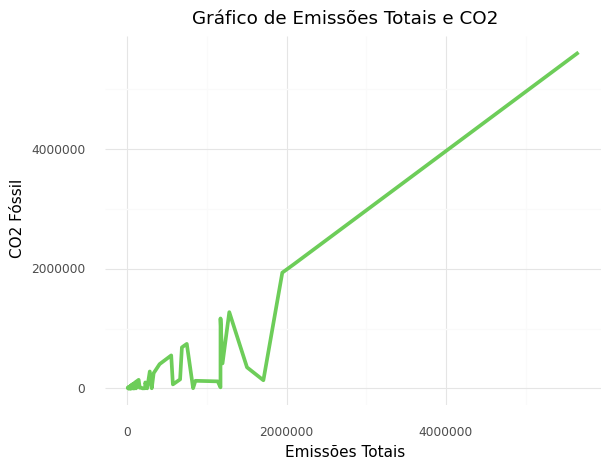

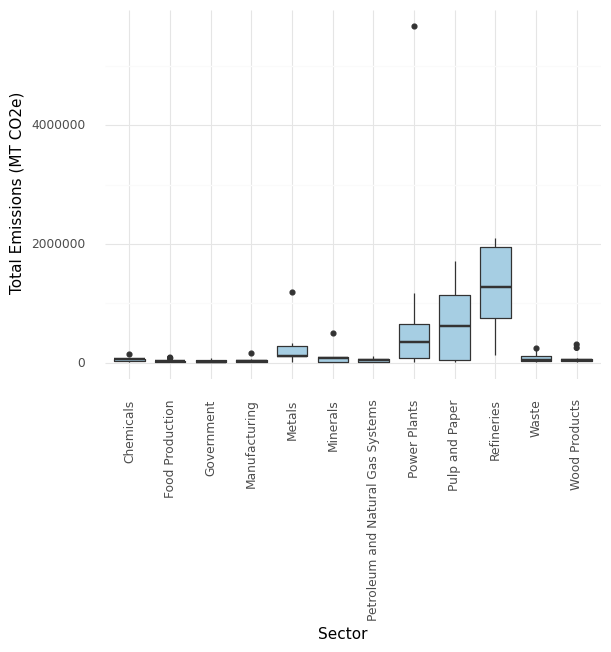

In [18]:

# Introdução:
## O efeito estufa é um fenômeno natural e possibilita a vida humana na Terra. 
## Porém, o grande problema é que o efeito estufa está aumentando muito rapidamente neste último século, 
## pois está havendo uma alta emissão de gases como gás carbônico, metano e óxido nitroso para a atmosfera. 
## Assim gerando um acúmulo de calor retido na atmosfera da terra, fazendo a temperatura aumentar. 
## Nos últimos 140 anos houve um aumento de 0,76°C, causando uma preocupação com a vida na terra. 
## Outro aspecto distinto da mudança atual do clima é a sua origem: ao passo que as mudanças do clima no passado decorreram de 
## fenômenos naturais, a maior parte da atual mudança do clima, particularmente nos últimos 50 anos, é atribuída às atividades humanas.

# Objetivo:
## O Objetivo do trabalho é apresentar, pela base de dados, os números das emissões dos gases do efeito estufa por município,
## gás específico, gases totais e setor de origem. Comprovando assim a participação humana no fenômeno de aquecimento global 
## por meio das emissões de gases poluintes,especificamente em Washington.
## Temos como finalidade Demonstrar por dados, os maiores setores, municípios mais poluentes e o gás mais recorrente.

# Fonte da base de dados:
## https://www.kaggle.com/ramyaparimi/greenhouse-gas-report-data-2015

# Metodologia:
## Serão utilizados boxplots, gráfico de pizza, diagramas de dispersão, gráfico de barra.
## Gráfico de pizza: utilizado para dividir em setores, exibindo uma informação relacionada.
## Gráfico de Barras: é uma forma de resumir um conjunto de dados categóricos.
## Gráfico de Linha: é utilizado para facilitar a identificação de tendências e anomalias.

# Importando a base de dados e as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
from scipy.stats import shapiro


greenhousegas = pd.read_csv('https://raw.githubusercontent.com/gslari/ProjectCO2Emissions/main/2015_Greenhouse_Gas_Report-_Data.csv')
display(greenhousegas)

# Fazendo o tratamendo selecionando as colunas desejadas

colunas = greenhousegas[['Address', 'Total Emissions (MT CO2e)', 'Nitrous Oxide (MT CO2e)', 'Sub Sector', 'Energy-Intensive, Trade-Exposed ', 'Point Size- Based on Total Emissions' ]]



## Montando os gráficos
# 1 - Gráfico de Pizza

# Obtém a contagem de ocorrências de cada valor único na coluna "Setor"
setor_counts = greenhousegas['Sector '].value_counts()

# Define as cores para cada fatia do gráfico
cores = ['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'brown', 'purple', 'lightblue', 'grey', 'lightgreen', 'black']

# Cria o gráfico de pizza
plt.pie(setor_counts.values, labels=setor_counts.index, colors=cores)

# Define o título do gráfico
plt.title("Setores mais Poluentes")

# Mostra o gráfico
plt.show()

# Análise:
## Nesse gráfico pode-se ver que dentre os setores poluentes, o que mais aparece em termos de repetição e não maior poluição é a “Food Production”,
## mostrando que, ao menos em Washington, o setor de produção alimentícia é um setor que se repete, gerando impacto na emissão dos gases. 
## Os outros dois setores são “Power Plants”, mostrando a poluição de usinas elétricas e “Wood Products”, que são produtos feitos de madeiras. 
## Mostrando que esses três setores poluentes mais repetitivos , são setores de produção humana, e não naturais.

# 2 - Gráfico de Barras empilhadas

grouped = greenhousegas.groupby(['Sector ', 'County']).sum()['Total Emissions (MT CO2e)'].unstack('Sector ').fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('Municípios')
plt.ylabel('Total de Emissões')
plt.title('Emissões de Gases de Efeito Estufa por Setor e Município')
plt.legend(title='Setor')
plt.show()

# Análise:
## Emissões por setores nos municípios.Podemos perceber que,os municípios King,Pierce e Whatcom 
## são considerados os maiores causadores da poluição,uma vez que,a liberação dos gases influencia o efeito estufa.

# Importar bibliotecas
from plotnine import *

# Gráfico de Linha
plot1 = (ggplot(greenhousegas) +
 aes(x='Total Emissions (MT CO2e)', y='Fossil CO2 (MT CO2)') +
 geom_line(size=1.5, colour="#6dcd59") +
 labs(x="Emissões Totais", y="CO2 Fóssil", title="Gráfico de Emissões Totais e CO2") +
 theme_minimal())

# Análise:
## Mostra o aumento da concentração dos gases de CO2 Fóssil ao longo do crescimento das atividades:
## Refinaria- a utilização de combustivel é um risco para o meio ambiente pois,a extração e o transporte e até mesmo o consumo, 
## provocam a ultilização de gases que atinge diretamente a natureza,“Wood Products” que são os produtos feitos por madeiras,“Power Plants” 
## que apresenta a soltura dos gases poluentes por meios de usinas elétrica, e por ultimo,“Pulp and paper” celulose 
## que é o aumento do desmatamento de árvores e ultilização de produtos químicos.

# Boxplot
plot2 = (ggplot(greenhousegas) +
 aes(x='Sector ', y='Total Emissions (MT CO2e)') +
 geom_boxplot(fill='#a6cee3') +
 theme_minimal() +
 theme(axis_text_x=element_text(angle=90)))

# Análise:
## Boxplot mostra que os setores com as maiores emissões são o de Refinaria, 
## uma vez que, as instalaçÕes de produção por processos e operações químicas possibilitam ainda mais as emissões,
## quando ocorre a degradação de certos materiais ou convertem matéria-prima em produtos de valor. 
## O de Pulp and paper, que são os setores de celulose e papel, utilizam madeiras como forma de criar matéria prima,
## assim produzindo a celulose,papel,papelão e outros produtos.Desta forma,os dois maiores são causados por ação humana 
## pois ao derrubar as árvores e usar compostos químicos contribui para o aumento do efeito estufa.

# Exibir os dois gráficos na mesma célula
print(plot1)
print(plot2)

# Conclusão:
## Analizando as variáveis, conclui-se que os maiores setores que emitem poluição são os de Refinaria,
## Setor de Celulose e Papel,porém os que mais aparecem em termos de números são Produção de Comida e Usinas Elétricas, 
## o gás mais recorrente é o CO2 Fóssil e os principais municípios que poluem são King,Pierce e Whatcom.
## Assim, podemos finalizar que, BP Cherry Point Refinery - Blaine, em Whatcom, é a indústria mais poluente de Washington, 
## se enquadrando no quesito município, setor e maior gás emitido, tendo um número de emissões totais de 2.093.437 e 2.077.888 de emissões de CO2 Fóssil.